In [474]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
file_path1 = "asthma_mort_states_2016.csv"
asthma_data = pd.read_csv(file_path1)

file_path2 = "AQI_data.csv"
chem_data = pd.read_csv(file_path2)


In [475]:
asthma_data.head()

,Unnamed: 0,LocationDesc,2010,2011,2012,2013,2014,2015,2016
0,0,Alabama,61,36,57,42,57,52,48
1,1,Alaska,,,,,,NaN,NaN
2,2,Arizona,58,92,80,98,86,76,108
3,3,Arkansas,37,46,30,36,33,30,45
4,4,California,403,403,384,410,407,393,391


In [476]:
# convert all year cols into numeric
asthma_data.dtypes
asthma_data = asthma_data.convert_objects(convert_numeric=True)
#asthma_data.dtypes


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [477]:
asthma_data.head()

,Unnamed: 0,LocationDesc,2010,2011,2012,2013,2014,2015,2016
0,0,Alabama,61.0,36.0,57.0,42.0,57.0,52.0,48.0
1,1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Arizona,58.0,92.0,80.0,98.0,86.0,76.0,108.0
3,3,Arkansas,37.0,46.0,30.0,36.0,33.0,30.0,45.0
4,4,California,403.0,403.0,384.0,410.0,407.0,393.0,391.0


In [478]:
#2)melt year columns to average asthma mortality in every state 
asthma_melted_df=pd.melt(asthma_data, id_vars=['LocationDesc'], value_vars=['2010','2011','2012','2013','2014','2015','2016'])
asthma_melted_df.head()

,LocationDesc,variable,value
0,Alabama,2010,61.0
1,Alaska,2010,NaN
2,Arizona,2010,58.0
3,Arkansas,2010,37.0
4,California,2010,403.0


In [479]:
#rename columns
asthma_melted_df = asthma_melted_df.rename(index=str, columns={"LocationDesc": "State", "variable": "Year", "value":"Asthma Mortality"})
asthma_melted_df.head()
asthma_melted_df.to_csv('asthma_mort_states_melted.csv', index=True, header=True)
asthma_melted_df.head()


,State,Year,Asthma Mortality
0,Alabama,2010,61.0
1,Alaska,2010,NaN
2,Arizona,2010,58.0
3,Arkansas,2010,37.0
4,California,2010,403.0


In [480]:
# calculate mean asthma mortality of 2010-2016 by state
Avg_asthma_byState = pd.DataFrame(asthma_melted_df.groupby("State")["Asthma Mortality"].mean())
Avg_asthma_byState.head()

,Asthma Mortality
State,
Alabama,50.428571
Alaska,NaN
Arizona,85.428571
Arkansas,36.714286
California,398.714286


In [481]:
#reset index
Avg_asthma_byState.reset_index(inplace=True)

Avg_asthma_byState.head()

,State,Asthma Mortality
0,Alabama,50.428571
1,Alaska,NaN
2,Arizona,85.428571
3,Arkansas,36.714286
4,California,398.714286


In [482]:
#remove United States row
Avg_asthma_noUS = Avg_asthma_byState.loc[Avg_asthma_byState['State'] != 'United States']
Avg_asthma_noUS.head()


,State,Asthma Mortality
0,Alabama,50.428571
1,Alaska,NaN
2,Arizona,85.428571
3,Arkansas,36.714286
4,California,398.714286


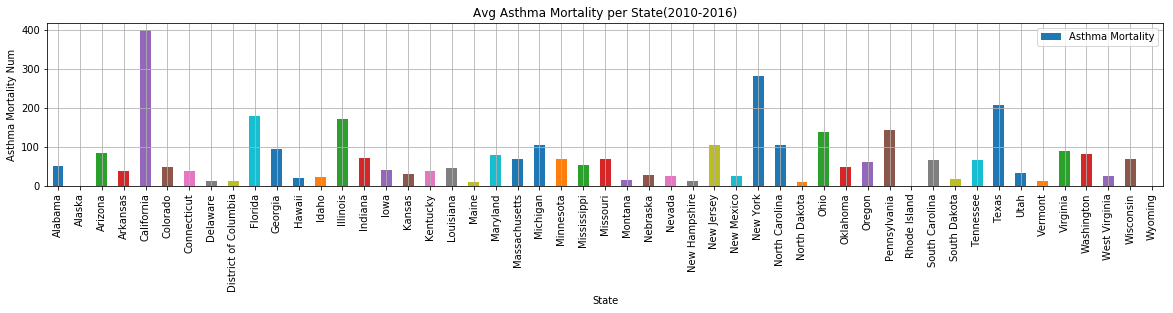

In [483]:
#3) plot avg asthma mortality for the period of 2010-2016 by state
Avg_asthma_noUS.plot(x='State', y='Asthma Mortality', kind="bar", figsize=(20,3))
plt.title("Avg Asthma Mortality per State(2010-2016)")
plt.xlabel("State")
plt.ylabel("Asthma Mortality Num")
plt.grid()



In [484]:
#4)filter pollt AQI dataset by selected cols
chem_data.head()

chemfilt = chem_data[['State', 'Year','NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
chemfilt.head()


,State,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,2000,46,34,13.0,25.0
1,Arizona,2000,34,27,4.0,26.0
2,Arizona,2000,48,14,16.0,28.0
3,Arizona,2000,72,28,23.0,34.0
4,Arizona,2000,58,10,21.0,42.0


In [485]:
#5)filter pollt AQI dataset by years 2010-2016 to match asthma dataset
chemfilt['Year']=chemfilt['Year'].astype('str')
chemfilt.dtypes
chemfilt=chemfilt[chemfilt['Year'].str.contains('2010|2011|2012|2013|2014|2015|2016')]
chemfilt.head()

/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
242220,Arizona,2010,45,29,9.0,18.0
242221,Arizona,2010,48,21,10.0,15.0
242222,Arizona,2010,52,24,9.0,16.0
242223,Arizona,2010,52,31,13.0,15.0
242224,Arizona,2010,57,25,13.0,15.0


In [486]:
# 6)merge asthma mortality data with pollt AQIs
merge_final_df = pd.merge(chemfilt, Avg_asthma_byState, on =['State'])
merge_final_df.to_csv('AQI_asthma_mort_states_melted.csv', index=True, header=True)

merge_final_df.head()


,State,Year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Asthma Mortality
0,Arizona,2010,45,29,9.0,18.0,85.428571
1,Arizona,2010,48,21,10.0,15.0,85.428571
2,Arizona,2010,52,24,9.0,16.0,85.428571
3,Arizona,2010,52,31,13.0,15.0,85.428571
4,Arizona,2010,57,25,13.0,15.0,85.428571


In [487]:
# 7) grouped by year the merged df and calc mean (AQIs + Asthma motality 2010-2016)
avg_AQI_asthm_byYear_df = pd.DataFrame(merge_final_df.groupby('Year')['Asthma Mortality','NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI'].mean())
avg_AQI_asthm_byYear_df.reset_index(inplace=True)

avg_AQI_asthm_byYear_df

,Year,Asthma Mortality,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,2010,206.560239,21.619048,34.873952,4.238372,4.898750
1,2011,190.952421,21.011178,34.924529,4.145762,4.677056
2,2012,176.846929,20.263957,35.646491,3.326040,4.530803
3,2013,181.925039,19.820931,35.963944,2.978427,4.269331
4,2014,177.620775,19.394214,36.922203,3.035975,4.226896
5,2015,174.386577,18.347113,37.239121,2.528072,4.322438
6,2016,173.865554,20.020997,33.687992,2.186680,4.454396


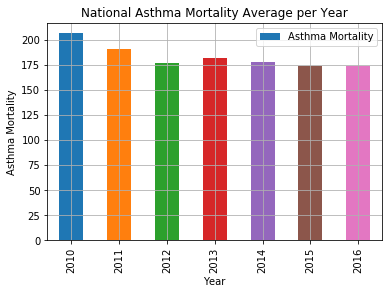

In [488]:
#8) national asthma avg over the years 
avg_AQI_asthm_byYear_df.plot(x='Year', y='Asthma Mortality', kind="bar")
plt.title("National Asthma Mortality Average per Year")
plt.xlabel("Year")
plt.ylabel("Asthma Mortality")
plt.grid()

In [489]:
#15) rearrange DF by state to look for any corr (asthma mort/pollts) by state

merge_final_df.head()

statesummary=pd.DataFrame(merge_final_df.melt(id_vars=['Year','State']).groupby(['State','variable'])['value'].mean())
statesummary=statesummary.reset_index()
statesummary.head()
statesummary.pivot(index='State',columns='variable')
statesummary
statesummary2=pd.DataFrame(statesummary.pivot_table(index=['State'], columns='variable'))
statesummary2.columns = ['_'.join(tup).rstrip('_') for tup in statesummary2.columns.values]
statesummary2.reset_index(inplace=True)
statesummary2.head()



,State,value_Asthma Mortality,value_CO AQI,value_NO2 AQI,value_O3 AQI,value_SO2 AQI
0,Alabama,50.428571,3.851662,21.228900,36.831202,7.005115
1,Alaska,NaN,6.528340,19.580972,17.712551,14.506073
2,Arizona,85.428571,6.410256,30.883507,41.481798,2.345046
3,Arkansas,36.714286,5.774202,21.624402,35.323898,2.668993
4,California,398.714286,5.534180,20.346237,37.311622,1.515042


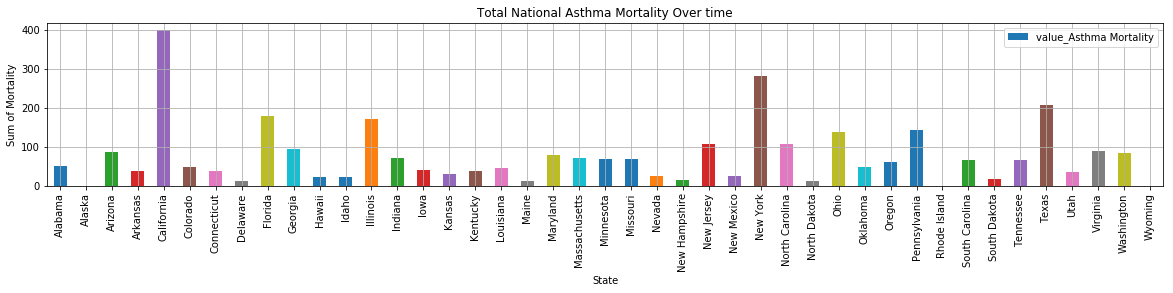

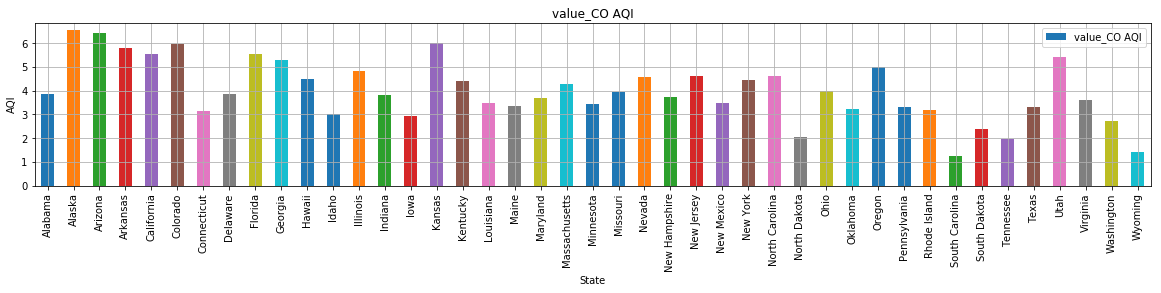

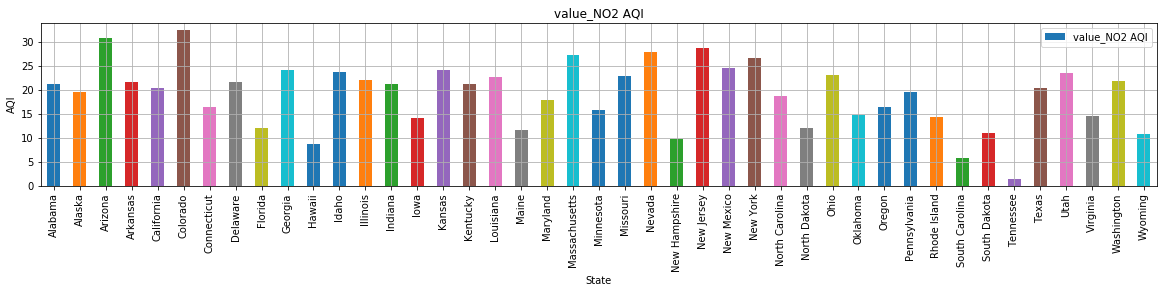

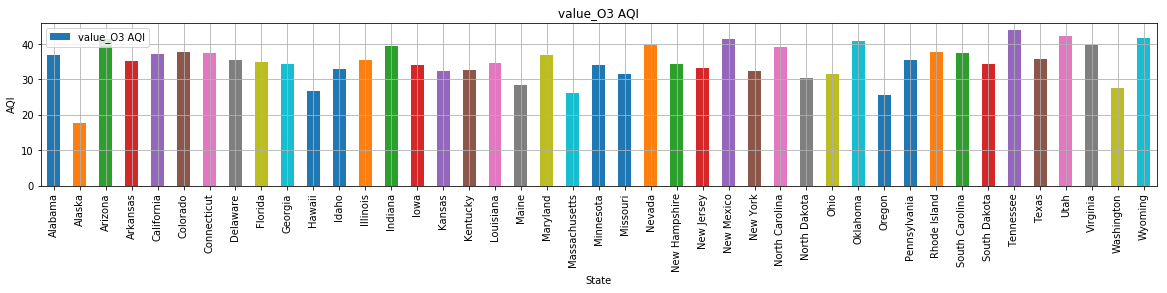

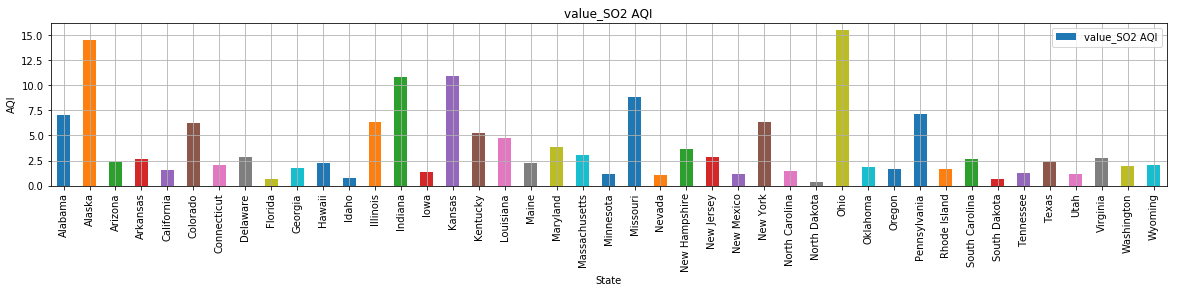

In [490]:
pollutants2=list(statesummary2.columns[2:])

statesummary2.plot(x='State', y='value_Asthma Mortality', kind="bar", figsize=(20,3))
plt.title("Total National Asthma Mortality Over time")
plt.xlabel("State")
plt.ylabel("Sum of Mortality")
plt.grid()

for pol in pollutants2:    
    statesummary2.plot(x='State', y=pol, kind="bar", figsize=(20,3))
    plt.title(pol)
    plt.xlabel("State")
    plt.ylabel("AQI")
    plt.grid()

In [491]:
# pandas corr matrix
corr = statesummary2.corr()
corr.style.background_gradient()

,value_Asthma Mortality,value_CO AQI,value_NO2 AQI,value_O3 AQI,value_SO2 AQI
value_Asthma Mortality,1,0.258307,0.161594,0.0546339,0.121281
value_CO AQI,0.258307,1,0.604591,-0.210436,0.314056
value_NO2 AQI,0.161594,0.604591,1,-0.0368257,0.29646
value_O3 AQI,0.0546339,-0.210436,-0.0368257,1,-0.342982
value_SO2 AQI,0.121281,0.314056,0.29646,-0.342982,1


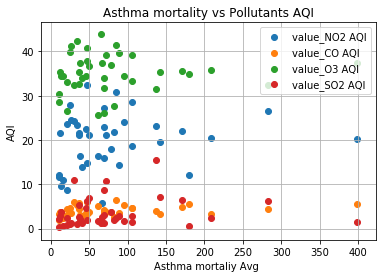

In [492]:

# Plot national pollutant AQIs avg 2010-2016
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_NO2 AQI'], marker='o' )
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_CO AQI'], marker='o' )
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_O3 AQI'], marker='o' )
plt.scatter(statesummary2['value_Asthma Mortality'], statesummary2['value_SO2 AQI'], marker='o')


plt.title("Asthma mortality vs Pollutants AQI")
plt.xlabel("Asthma mortaliy Avg ")
plt.ylabel("AQI")
plt.grid()

plt.legend(loc="best")



